In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
#import celltypist
#import scvi
#import scvelo as scv
#from celltypist import models
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.pyplot import rc_context

sc.set_figure_params(dpi=100, color_map = 'viridis_r', transparent=False, frameon=False)
sc.settings.verbosity = 1
sc.logging.print_header()

version = '2023-05-16'

sc.settings.figdir = './scanpy/{}/graph'.format(version)
sc.settings.cachedir = './scanpy/{}/cache'.format(version)
%config InlineBackend.figure_format = 'retina'

c:\Users\Hua\miniconda3\envs\scanpy\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.22.0 scipy==1.9.3 pandas==1.5.1 scikit-learn==1.1.2 statsmodels==0.13.2 python-igraph==0.10.2 louvain==0.8.0 pynndescent==0.5.7


# Data

In [2]:
adata_MC = sc.read('./write/MC_leiden.h5ad')
adata_MC.uns['log1p']["base"] = None
adata_MC

AnnData object with n_obs × n_vars = 33577 × 19590
    obs: 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'Phenotype', 'donor_id', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'predicted_labels_NC2022', 'majority_voting_NC2022', 'predicted_labels_builtin', 'majority_voting_builtin', 'leiden', 'Major_cluster', 'Sample', 'Minor_cluster', 'Major_category'
    var: 'gene_ids', 'feature_types', 'genome', 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'Major_category_colors', 'Major_cluster_colors', 'Minor_cluster_colors', 'Phenotype_colors', 'donor_id_colors', 'leiden', 'leiden_colors', 'log1p', 'majority_voting_NC2022_colors', 'majority_voting_builtin_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    layers: 'ambiguous', 'counts', 'matrix', 'spli

In [3]:
adata_MC_NK = adata_MC[adata_MC.obs['Major_category'] == 'NK']
adata_MC_NK

View of AnnData object with n_obs × n_vars = 4407 × 19590
    obs: 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'Phenotype', 'donor_id', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'predicted_labels_NC2022', 'majority_voting_NC2022', 'predicted_labels_builtin', 'majority_voting_builtin', 'leiden', 'Major_cluster', 'Sample', 'Minor_cluster', 'Major_category'
    var: 'gene_ids', 'feature_types', 'genome', 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'Major_category_colors', 'Major_cluster_colors', 'Minor_cluster_colors', 'Phenotype_colors', 'donor_id_colors', 'leiden', 'log1p', 'majority_voting_NC2022_colors', 'majority_voting_builtin_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    layers: 'ambiguous', 'counts', 'matrix', 'spliced', 'uns

In [4]:
adata_MC_NK.obs

,initial_size_spliced,initial_size_unspliced,initial_size,Phenotype,donor_id,batch,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,predicted_labels_NC2022,majority_voting_NC2022,predicted_labels_builtin,majority_voting_builtin,leiden,Major_cluster,Sample,Minor_cluster,Major_category
AAACCTGAGGTAGCCA-0,193,393,193.0,MG_crisis,Patient_1,0,1557,1557,2929.0,80.0,2.731308,NK cell,NK cell,CD16+ NK cells,CD16+ NK cells,4,NK cells,Patient_1_MG_crisis,NK cells,NK
AAACCTGCATGCTGGC-0,104,267,104.0,MG_crisis,Patient_1,0,1255,1255,2571.0,48.0,1.866978,Memory B cell (II),NK cell,CD16+ NK cells,CD16+ NK cells,4,NK cells,Patient_1_MG_crisis,NK cells,NK
AAACCTGGTAGCTGCC-0,108,267,108.0,MG_crisis,Patient_1,0,1400,1400,2778.0,45.0,1.619870,NK cell,NK cell,CD16+ NK cells,CD16+ NK cells,4,NK cells,Patient_1_MG_crisis,NK cells,NK
AAAGATGAGCGATCCC-0,131,275,131.0,MG_crisis,Patient_1,0,1479,1479,3359.0,75.0,2.232807,NK cell,NK cell,CD16+ NK cells,CD16+ NK cells,4,NK cells,Patient_1_MG_crisis,NK cells,NK
AAAGATGCAATGGAGC-0,217,309,217.0,MG_crisis,Patient_1,0,1476,1476,2696.0,42.0,1.557863,NK cell,NK cell,CD16+ NK cells,CD16+ NK cells,4,NK cells,Patient_1_MG_crisis,NK cells,NK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTTCGGTTAAC-3,209,460,209.0,After_crisis,Patient_2,3,1749,1749,3447.0,108.0,3.133159,NK cell,NK cell,CD16+ NK cells,CD16+ NK cells,4,NK cells,Patient_2_After_crisis,NK cells,NK
TTTGGTTTCTGTCAAG-3,247,320,247.0,After_crisis,Patient_2,3,1451,1451,3188.0,43.0,1.348808,NK cell,NK cell,CD16+ NK cells,CD16+ NK cells,4,NK cells,Patient_2_After_crisis,NK cells,NK
TTTGTCAAGTGAACGC-3,222,419,222.0,After_crisis,Patient_2,3,1981,1981,4551.0,41.0,0.900901,NK cell,NK cell,CD16+ NK cells,CD16+ NK cells,4,NK cells,Patient_2_After_crisis,NK cells,NK
TTTGTCAGTAGCCTCG-3,162,353,162.0,After_crisis,Patient_2,3,1473,1473,3248.0,43.0,1.323892,CD4 Tem (Th1),NK cell,CD16+ NK cells,CD16+ NK cells,4,NK cells,Patient_2_After_crisis,NK cells,NK


In [4]:
sc.tl.rank_genes_groups(adata_MC_NK, 'Phenotype', method='wilcoxon', key_added = "wilcoxon")
Crisis_genes = sc.get.rank_genes_groups_df(adata_MC_NK, group='MG_crisis', key='wilcoxon')
Crisis_genes = Crisis_genes[(Crisis_genes.pvals_adj < 0.05) & (abs(Crisis_genes.logfoldchanges) > 0.5)].sort_values(by=['logfoldchanges'], ascending=False).reset_index(drop=True)

Crisis_genes_up = Crisis_genes[(Crisis_genes.pvals_adj < 0.05) & (Crisis_genes.logfoldchanges > 0.5)].sort_values(by=['scores'], ascending=False).reset_index(drop=True)
Crisis_genes_down = Crisis_genes[(Crisis_genes.pvals_adj < 0.05) & (Crisis_genes.logfoldchanges < -0.5)].sort_values(by=['scores'], ascending=False).reset_index(drop=True)

glist_up = Crisis_genes_up['names'].squeeze().str.strip().tolist()
glist_down = Crisis_genes_down['names'].squeeze().str.strip().tolist()
glist_all = glist_up + glist_down

print(f'glist_up: {len(glist_up)}, glist_down: {len(glist_down)}, glist_all: {len(glist_all)}')

Crisis_genes.to_csv('./write/NK_DEG_MC_vs_AC.csv', index=False)

c:\Users\Hua\miniconda3\envs\scanpy\lib\site-packages\anndata\compat\_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


glist_up: 30, glist_down: 750, glist_all: 780


['ARCHS4_Cell-lines', 'ARCHS4_IDG_Coexp', 'ARCHS4_Kinases_Coexp', 'ARCHS4_TFs_Coexp', 'ARCHS4_Tissues', 'Achilles_fitness_decrease', 'Achilles_fitness_increase', 'Aging_Perturbations_from_GEO_down', 'Aging_Perturbations_from_GEO_up', 'Allen_Brain_Atlas_10x_scRNA_2021', 'Allen_Brain_Atlas_down', 'Allen_Brain_Atlas_up', 'Azimuth_Cell_Types_2021', 'BioCarta_2013', 'BioCarta_2015', 'BioCarta_2016', 'BioPlanet_2019', 'BioPlex_2017', 'CCLE_Proteomics_2020', 'CORUM', 'COVID-19_Related_Gene_Sets', 'COVID-19_Related_Gene_Sets_2021', 'Cancer_Cell_Line_Encyclopedia', 'CellMarker_Augmented_2021', 'ChEA_2013', 'ChEA_2015', 'ChEA_2016', 'ChEA_2022', 'Chromosome_Location', 'Chromosome_Location_hg19', 'ClinVar_2019', 'DSigDB', 'Data_Acquisition_Method_Most_Popular_Genes', 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019', 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019', 'Descartes_Cell_Types_and_Tissue_2021', 'Diabetes_Perturbations_GEO_2022', 'DisGeNET', 'Disease_Perturbations_from_GEO_down', 'Disease

<AxesSubplot: xlabel='Combined Score'>

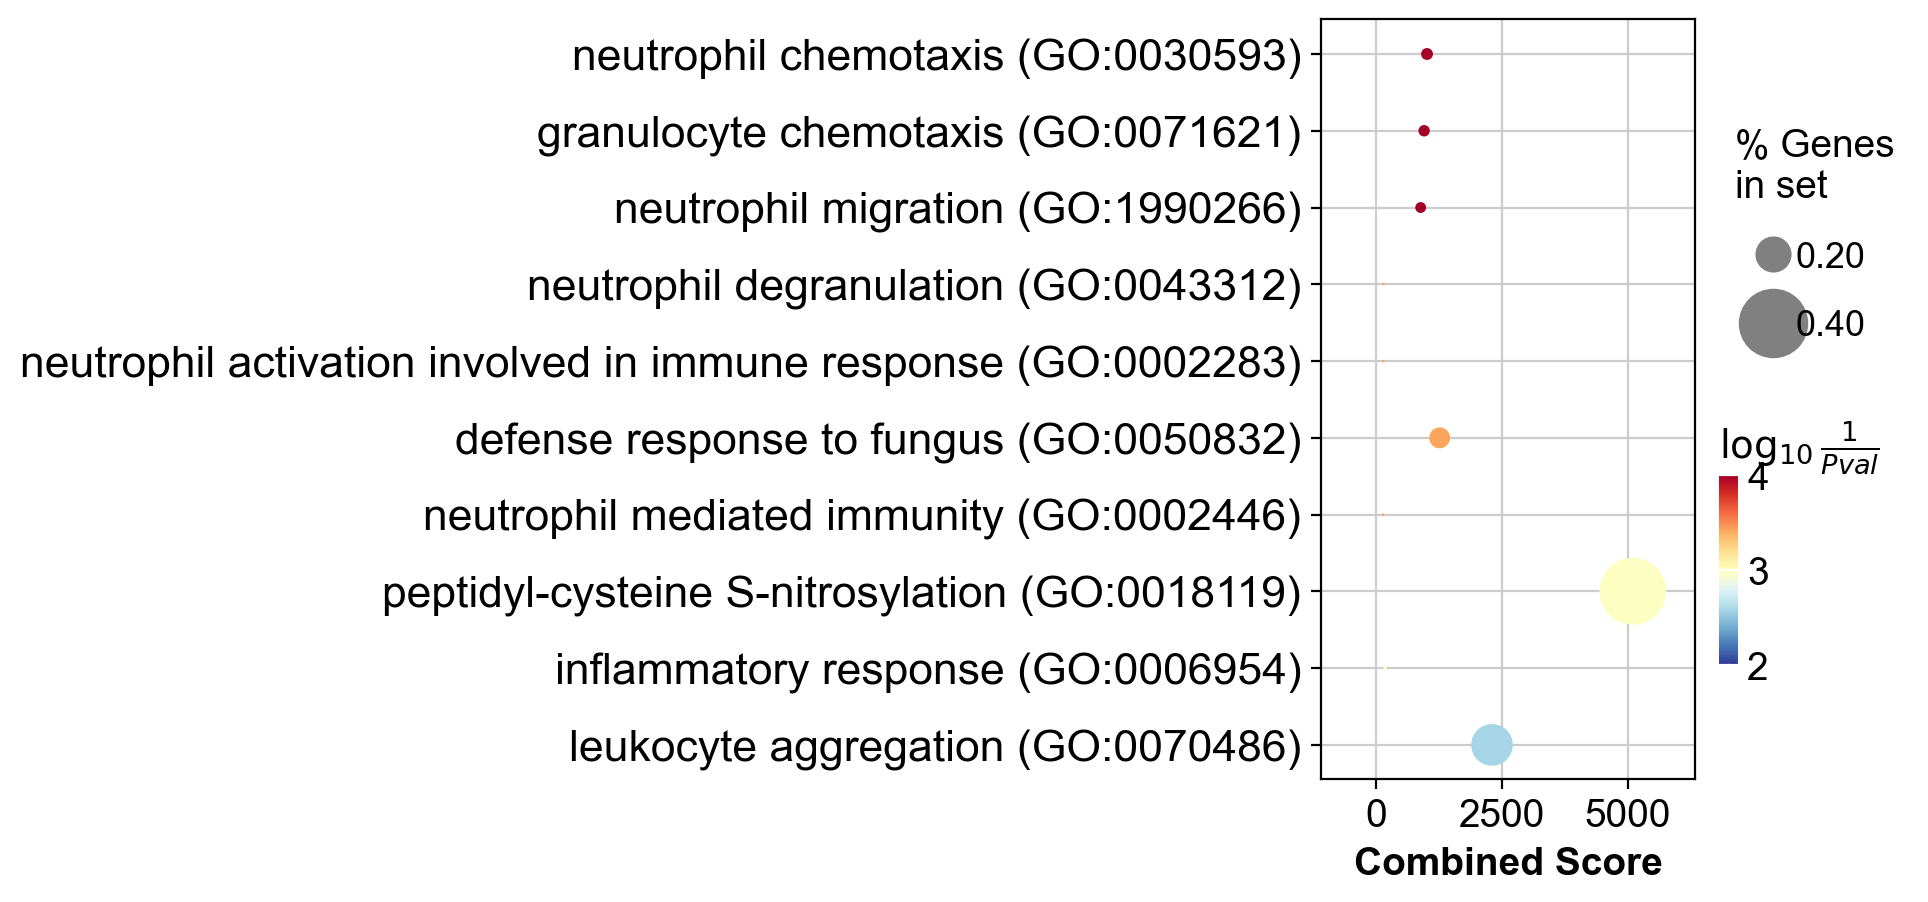

In [5]:
import gseapy as gp

#Available databases : ‘Human’, ‘Mouse’, ‘Yeast’, ‘Fly’, ‘Fish’, ‘Worm’ 
gene_set_names = gp.get_library_name(organism='Human')
print(gene_set_names)


enr_res = gp.enrichr(gene_list=glist_up,
                     organism='Human',
                     gene_sets='GO_Biological_Process_2021',
                     #description='pathway',
                     cutoff = 0.5)

enr_res.results.head()

gp.dotplot(enr_res.res2d, title='',cmap='RdYlBu_r', size=10, figsize=(3,5), cutoff = 0.5) #cmap='viridis_r'

#plt.savefig('glist_up GO_Biological.pdf')